In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
import os
os.getcwd()

'C:\\Users\\otrin\\OneDrive\\Desktop\\Git\\machine_learning'

# Read the CSV and Perform Basic Data Cleaning

In [4]:
# https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-

columns = [
    "loan_amnt", "int_rate", "installment", "home_ownership",
    "annual_inc", "verification_status", "issue_d", "loan_status",
    "pymnt_plan", "dti", "delinq_2yrs", "inq_last_6mths",
    "open_acc", "pub_rec", "revol_bal", "total_acc",
    "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt",
    "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
    "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "next_pymnt_d",
    "collections_12_mths_ex_med", "policy_code", "application_type", "acc_now_delinq",
    "tot_coll_amt", "tot_cur_bal", "open_acc_6m", "open_act_il",
    "open_il_12m", "open_il_24m", "mths_since_rcnt_il", "total_bal_il",
    "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc",
    "all_util", "total_rev_hi_lim", "inq_fi", "total_cu_tl",
    "inq_last_12m", "acc_open_past_24mths", "avg_cur_bal", "bc_open_to_buy",
    "bc_util", "chargeoff_within_12_mths", "delinq_amnt", "mo_sin_old_il_acct",
    "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op", "mo_sin_rcnt_tl", "mort_acc",
    "mths_since_recent_bc", "mths_since_recent_inq", "num_accts_ever_120_pd", "num_actv_bc_tl",
    "num_actv_rev_tl", "num_bc_sats", "num_bc_tl", "num_il_tl",
    "num_op_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0",
    "num_sats", "num_tl_120dpd_2m", "num_tl_30dpd", "num_tl_90g_dpd_24m",
    "num_tl_op_past_12m", "pct_tl_nvr_dlq", "percent_bc_gt_75", "pub_rec_bankruptcies",
    "tax_liens", "tot_hi_cred_lim", "total_bal_ex_mort", "total_bc_limit",
    "total_il_high_credit_limit", "hardship_flag", "debt_settlement_flag"
]

target = ["loan_status"]

In [5]:
# Load the data
file_path = Path('Resources/LoanStats_2019Q1.csv')
df = pd.read_csv(file_path, skiprows=1)[:-2]
df = df.loc[:, columns].copy()
df

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,20000.0,17.19%,499.10,RENT,47000.0,Source Verified,Mar-2019,Issued,n,14.02,...,98.0,12.5,0.0,0.0,75824.0,31546.0,33800.0,21524.0,N,N
1,21225.0,14.74%,502.05,MORTGAGE,225000.0,Not Verified,Mar-2019,Issued,n,16.80,...,100.0,50.0,1.0,0.0,747075.0,209426.0,53500.0,128175.0,N,N
2,5000.0,17.97%,180.69,MORTGAGE,62000.0,Not Verified,Mar-2019,Issued,n,19.82,...,66.7,50.0,0.0,0.0,255738.0,31615.0,9400.0,39938.0,N,N
3,20000.0,8.19%,628.49,MORTGAGE,200000.0,Not Verified,Mar-2019,Issued,n,22.66,...,95.7,22.2,0.0,0.0,448069.0,84744.0,49400.0,105180.0,N,N
4,12000.0,15.57%,289.09,MORTGAGE,49000.0,Source Verified,Mar-2019,Issued,n,13.47,...,86.1,14.3,0.0,0.0,189260.0,106025.0,24400.0,68860.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115670,5000.0,13.56%,169.83,MORTGAGE,48000.0,Not Verified,Jan-2019,Current,n,8.28,...,90.5,NaN,0.0,0.0,88613.0,9182.0,0.0,11413.0,N,N
115671,6000.0,6.46%,183.79,MORTGAGE,96000.0,Not Verified,Jan-2019,Current,n,0.31,...,100.0,0.0,1.0,0.0,33500.0,50.0,14900.0,0.0,N,N
115672,16000.0,16.14%,563.62,MORTGAGE,32000.0,Source Verified,Jan-2019,Current,n,20.89,...,93.3,37.5,1.0,0.0,34200.0,17066.0,16400.0,0.0,N,N
115673,16000.0,11.31%,350.36,MORTGAGE,72000.0,Verified,Jan-2019,Current,n,7.02,...,94.3,0.0,1.0,0.0,251486.0,74835.0,23000.0,63090.0,N,N


In [6]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
df

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,20000.0,17.19%,499.10,RENT,47000.0,Source Verified,Mar-2019,Issued,n,14.02,...,98.0,12.5,0.0,0.0,75824.0,31546.0,33800.0,21524.0,N,N
1,21225.0,14.74%,502.05,MORTGAGE,225000.0,Not Verified,Mar-2019,Issued,n,16.80,...,100.0,50.0,1.0,0.0,747075.0,209426.0,53500.0,128175.0,N,N
2,5000.0,17.97%,180.69,MORTGAGE,62000.0,Not Verified,Mar-2019,Issued,n,19.82,...,66.7,50.0,0.0,0.0,255738.0,31615.0,9400.0,39938.0,N,N
3,20000.0,8.19%,628.49,MORTGAGE,200000.0,Not Verified,Mar-2019,Issued,n,22.66,...,95.7,22.2,0.0,0.0,448069.0,84744.0,49400.0,105180.0,N,N
4,12000.0,15.57%,289.09,MORTGAGE,49000.0,Source Verified,Mar-2019,Issued,n,13.47,...,86.1,14.3,0.0,0.0,189260.0,106025.0,24400.0,68860.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115670,5000.0,13.56%,169.83,MORTGAGE,48000.0,Not Verified,Jan-2019,Current,n,8.28,...,90.5,NaN,0.0,0.0,88613.0,9182.0,0.0,11413.0,N,N
115671,6000.0,6.46%,183.79,MORTGAGE,96000.0,Not Verified,Jan-2019,Current,n,0.31,...,100.0,0.0,1.0,0.0,33500.0,50.0,14900.0,0.0,N,N
115672,16000.0,16.14%,563.62,MORTGAGE,32000.0,Source Verified,Jan-2019,Current,n,20.89,...,93.3,37.5,1.0,0.0,34200.0,17066.0,16400.0,0.0,N,N
115673,16000.0,11.31%,350.36,MORTGAGE,72000.0,Verified,Jan-2019,Current,n,7.02,...,94.3,0.0,1.0,0.0,251486.0,74835.0,23000.0,63090.0,N,N


In [7]:
# Drop the null rows
df = df.dropna()
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,20000.0,17.19%,499.10,RENT,47000.0,Source Verified,Mar-2019,Issued,n,14.02,...,98.0,12.5,0.0,0.0,75824.0,31546.0,33800.0,21524.0,N,N
1,21225.0,14.74%,502.05,MORTGAGE,225000.0,Not Verified,Mar-2019,Issued,n,16.80,...,100.0,50.0,1.0,0.0,747075.0,209426.0,53500.0,128175.0,N,N
3,20000.0,8.19%,628.49,MORTGAGE,200000.0,Not Verified,Mar-2019,Issued,n,22.66,...,95.7,22.2,0.0,0.0,448069.0,84744.0,49400.0,105180.0,N,N
4,12000.0,15.57%,289.09,MORTGAGE,49000.0,Source Verified,Mar-2019,Issued,n,13.47,...,86.1,14.3,0.0,0.0,189260.0,106025.0,24400.0,68860.0,N,N
6,25000.0,7.02%,772.16,MORTGAGE,305000.0,Not Verified,Mar-2019,Issued,n,8.16,...,100.0,0.0,0.0,0.0,840287.0,65339.0,81000.0,38858.0,N,N


In [8]:
# Remove the `Issued` loan status
issued_mask = df['loan_status'] != 'Issued'
df = df.loc[issued_mask]
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
93,10500.0,17.19%,375.35,RENT,66000.0,Source Verified,Mar-2019,Current,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
99,25000.0,20.00%,929.09,MORTGAGE,105000.0,Verified,Mar-2019,Current,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
132,20000.0,20.00%,529.88,MORTGAGE,56000.0,Verified,Mar-2019,Current,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
133,10000.0,16.40%,353.55,RENT,92000.0,Verified,Mar-2019,Current,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
140,22000.0,14.74%,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,Current,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N


In [9]:
# convert interest rate to numerical
df['int_rate'] = df['int_rate'].str.replace('%', '')
df['int_rate'] = df['int_rate'].astype('float') / 100
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
93,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,Current,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
99,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,Current,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
132,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,Current,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
133,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,Current,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
140,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,Current,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N


In [10]:
# Convert the target column values to low_risk and high_risk based on their values
x = {'Current': 'low_risk'}   
df = df.replace(x)
x = dict.fromkeys(['Late (31-120 days)', 'Late (16-30 days)', 'Default', 'In Grace Period'], 'high_risk')    
df = df.replace(x)
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
93,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
99,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
132,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
133,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
140,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N


In [11]:
df.reset_index(inplace=True, drop=True)
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N


# Split the Data into Training and Testing

In [12]:
# Create our features
X_df = df.drop(columns=['loan_status'])
X = pd.get_dummies(X_df, columns=["home_ownership","verification_status","issue_d",
                                  "pymnt_plan","initial_list_status","next_pymnt_d","debt_settlement_flag",
                                  "application_type","hardship_flag"], drop_first = True)

# Create our target
y = df['loan_status'].to_frame()

In [13]:
X.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,issue_d_Jan-2019,issue_d_Mar-2019,initial_list_status_w,next_pymnt_d_May-2019,application_type_Joint App
count,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,...,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000
mean,16677.594562,0.127718,480.652863,8.821371e+04,21.778153,0.217766,0.497697,12.587340,0.126030,17604.142828,...,0.526309,0.106747,0.357659,0.373992,0.148001,0.451066,0.177238,0.876121,0.616839,0.139660
std,10277.348590,0.048130,288.062432,1.155800e+05,20.199244,0.718367,0.758122,6.022869,0.336797,21835.880400,...,0.499311,0.308793,0.479314,0.483865,0.355104,0.497603,0.381873,0.329446,0.486161,0.346637
min,1000.000000,0.060000,30.890000,4.000000e+01,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9000.000000,0.088100,265.730000,5.000000e+04,13.890000,0.000000,0.000000,8.000000,0.000000,6293.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,15000.000000,0.118000,404.560000,7.300000e+04,19.760000,0.000000,0.000000,11.000000,0.000000,12068.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,24000.000000,0.155700,648.100000,1.040000e+05,26.660000,0.000000,1.000000,16.000000,0.000000,21735.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,40000.000000,0.308400,1676.230000,8.797500e+06,999.000000,18.000000,5.000000,72.000000,4.000000,587191.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Check the balance of our target values
y['loan_status'].value_counts()

low_risk     68470
high_risk      347
Name: loan_status, dtype: int64

In [15]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble AdaBoost classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Print the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier onely, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [16]:
# Scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Resample the training data with the RandomOversampler
from imblearn.ensemble import BalancedRandomForestClassifier

brfc = BalancedRandomForestClassifier(n_estimators =1000, random_state=1)
model = brfc.fit(X_train_scaled, y_train)
BalancedRandomForestClassifier()

BalancedRandomForestClassifier()

In [17]:
# Calculate the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predictions = model.predict(X_test_scaled)
accuracy_score(y_test, predictions)

0.9188026736413833

In [18]:
# Calculate the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, predictions)

0.8162470639899118

In [19]:
# Display the confusion matrix
confusion_matrix(y_test, predictions)

array([[   62,    25],
       [ 1372, 15746]], dtype=int64)

In [20]:
# Print the imbalanced classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

   high_risk       0.04      0.71      0.08        87
    low_risk       1.00      0.92      0.96     17118

    accuracy                           0.92     17205
   macro avg       0.52      0.82      0.52     17205
weighted avg       0.99      0.92      0.95     17205



In [21]:
# List the features sorted in descending order by feature importance
importances = model.feature_importances_
sorted(zip(model.feature_importances_, X.columns), reverse=True)[:20]

[(0.07440136919465735, 'total_rec_prncp'),
 (0.061437291161306265, 'total_rec_int'),
 (0.06130032888752441, 'total_pymnt_inv'),
 (0.06055470587529498, 'last_pymnt_amnt'),
 (0.05853446188877031, 'total_pymnt'),
 (0.028841819188718195, 'int_rate'),
 (0.019184048857469934, 'issue_d_Jan-2019'),
 (0.018344422390578374, 'dti'),
 (0.017900068474105562, 'installment'),
 (0.01592192753388305, 'il_util'),
 (0.015894578111261017, 'mths_since_recent_inq'),
 (0.01585808634374961, 'revol_bal'),
 (0.01574914114162214, 'annual_inc'),
 (0.015428205189883767, 'out_prncp_inv'),
 (0.015351828767001684, 'max_bal_bc'),
 (0.015284821003877486, 'mo_sin_old_rev_tl_op'),
 (0.015090901975931078, 'out_prncp'),
 (0.014683827332326451, 'bc_util'),
 (0.014505100753674689, 'avg_cur_bal'),
 (0.014270607338656932, 'mo_sin_old_il_acct')]

### Easy Ensemble AdaBoost Classifier

In [22]:
# Train the Classifier
from imblearn.ensemble import EasyEnsembleClassifier

model = EasyEnsembleClassifier(base_estimator=None, n_estimators=100, n_jobs=1, random_state=1, 
                                   replacement=False, sampling_strategy='auto', verbose=0, 
                                   warm_start=False)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

EasyEnsembleClassifier()

EasyEnsembleClassifier()

In [23]:
# Calculate the accuracy score
predictions = model.predict(X_test_scaled)
accuracy_score(y_test, predictions)

0.9445510026155187

In [24]:
# Calculated the balanced accuracy score
predictions = model.predict(X_test_scaled)
balanced_accuracy_score(y_test, predictions)

0.9263912558266958

In [25]:
# Print the imbalanced classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

   high_risk       0.08      0.91      0.14        87
    low_risk       1.00      0.94      0.97     17118

    accuracy                           0.94     17205
   macro avg       0.54      0.93      0.56     17205
weighted avg       0.99      0.94      0.97     17205



Table 1: Balanced Random Forest
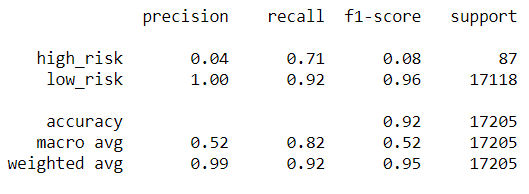

Table 2: ADABoost

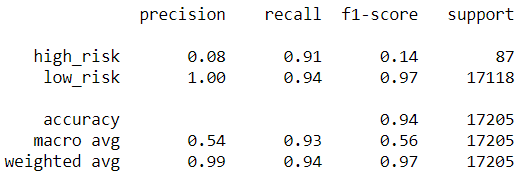



# Ensemble Learners

## Balance Accuracy
Although the Random Forest resulted in marginally less accuracy score (0.92) vs ADABoost (0.94), the balanced accuracy of the Random Forest method is significantly lower at 0.81 vs ADABoost at 0.92. 

## Recall 
The weighted average recall comparing the two methods are also very similar with ADABoost being slightly better at 0.94 compared to Random Forest at 0.92.

## Precision 
The weighted average precision comparing the two methods are exactly the same with ADABoost and  Random Forest at 0.99. Macro average scores are very close 0.54 for ADABoost and 0.52 for Random Forest.

## Recommendation

Of the two methods used in ensemble learning models ADABoost appears to be the slightly more accurate model based on the balanced accuracy scores, recall and precision. Therefore, ADABoost is recommended to be used to predict credit risk.

## Resampling Methods vs Ensemble Methods Recommendation

Comparing the resampling methods vs ensemble methods, in this analysis, the ensemble methods appears to be providing better accuracy as compared to resampling methods. Therefore, ensemble methods should definitely be considered.